In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from dateutil import parser

In [4]:
def get_quke_data(normalized=0):
    col_names = ['EventID', 'Time','Latitude','Longitude','Depth','Magnitude']
    fl_name = 'fdsnws-event_2017-06-27T13-14-14Z.csv'
    stock = pd.read_csv(fl_name, header=0, names=col_names) 
    df = pd.DataFrame(stock)    
    
    dates=[]
    for date in df['Time'].tolist():
        datet= parser.parse(date)
        dates.append(datet)
        
    previous_date = dates[0]
    elapsed_times=[]
    for date in dates:
        elapsedt = date - previous_date
        elapsed_times.append((divmod(elapsedt.total_seconds(),3600)[0])/24)
        previous_date = date
        
    df['Time_diff'] = elapsed_times
    #df['Time_diff'] /= 100
    
#     df['Date'], df['Hour'] = time_split
    
#     date_split = df['Date'].str.split('-').str
#     df['Year'], df['Month'], df['Day'] = date_split
#     hour_split = df['Hour'].str.split(':').str
#     df['HourNr'],x,y = hour_split
#     min_year = df['Year'].min()
    #df['Year'] = df['Year'].astype(int) - int(min_year)
    
    #delta_lat = df['Latitude'].max() - df['Latitude'].min()
    #delta_long = df['Longitude'].max() - df['Longitude'].min()
   # delta_depth = df['Depth'].max() - df['Depth'].min()
#     delta_year = float(df['Year'].max()) - float(df['Year'].min())
#     print(int(df['Year'].max()))
    
#     df['Latitude'] = (df['Latitude'].max() - df['Latitude'])/delta_lat
#     df['Longitude'] = (df['Longitude'].max() - df['Longitude'])/delta_long
#     df['Depth'] = (df['Depth'].max() - df['Depth'])/delta_depth
#     df['Year'] = (float(df['Year'].max()) - df['Year'].astype(float))/delta_year
#     #df['Magnitude'] = df['Magnitude']/10
#     df['Month'] = (int(df['Month'].max()) - df['Month'].astype(int))/12
#     df['Day'] = (int(df['Day'].max()) - df['Day'].astype(int))/31
#     df['HourNr'] = (int(df['HourNr'].max()) - df['HourNr'].astype(int))/24

    
    df['Latitude'] = 49 - df['Latitude']
    df['Longitude'] = 32 - df['Longitude']
    df['Depth'] = df['Depth']/100
#     df['Year'] = 2017 - df['Year'].astype(int)
    
    df['Magnitude'] /=10
    tmp = df['Magnitude']
    df.drop(labels=['Magnitude'], axis=1,inplace = True)
    df.insert(len(list(df)), 'Magnitude', tmp)

    df.drop(df.columns[[0,1,4]], axis=1, inplace=True) 
    return df

In [5]:
df = get_quke_data()
df.head()

,Latitude,Longitude,Time_diff,Magnitude
0,3.3275,5.4143,0.000000,0.44
1,3.4783,5.7129,1.250000,0.47
2,5.2466,11.4695,1.291667,0.30
3,5.4215,11.4864,7.833333,0.28
4,5.6238,12.0838,4.208333,0.33


In [4]:
df.dropna(inplace=True)
df.isnull().values.any()
df

,Latitude,Longitude,Time_diff,Magnitude
0,3.3275,5.4143,0.000000,0.44
1,3.4783,5.7129,1.250000,0.47
2,5.2466,11.4695,1.291667,0.30
3,5.4215,11.4864,7.833333,0.28
4,5.6238,12.0838,4.208333,0.33
5,5.7175,11.1630,5.750000,0.34
6,5.2925,11.5682,7.583333,0.25
7,5.0488,11.9042,7.500000,0.23
8,3.2486,5.2924,37.125000,0.39
9,3.3300,5.8100,14.125000,0.27


In [5]:
from sklearn import preprocessing

df = df.convert_objects(convert_numeric=True)
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)

df_normalized


/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,0,1,2,3
0,-0.310009,-0.512730,-0.294559,3.103488
1,-0.104940,-0.378049,0.212369,3.641093
2,2.299728,2.218418,0.229266,0.594667
3,2.537570,2.226041,2.882188,0.236264
4,2.812673,2.495493,1.412097,1.132271
5,2.940093,2.080174,2.037308,1.311473
6,2.362146,2.262936,2.780802,-0.301341
7,2.030745,2.414486,2.747007,-0.659744
8,-0.417303,-0.567712,14.761192,2.207481
9,-0.306609,-0.334252,5.433723,0.057062


In [6]:
df_normalized.describe()

,0,1,2,3
count,1.442100e+04,1.442100e+04,14421.000000,1.442100e+04
mean,-7.095080e-17,3.941711e-16,0.000000,5.045390e-16
std,1.000035e+00,1.000035e+00,1.000035,1.000035e+00
min,-3.815088e+00,-2.552025e+00,-0.294559,-4.781379e+00
25%,-4.425968e-01,-5.967587e-01,-0.277661,-6.597440e-01
50%,-1.324092e-01,-4.242353e-01,-0.193173,-3.013409e-01
75%,3.216532e-01,8.032748e-01,-0.007300,5.946668e-01
max,3.141763e+00,2.519489e+00,43.047755,7.225124e+00


In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Nadam

Using TensorFlow backend.


In [8]:
def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
#         model.add(Dropout(d))
#         model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(32,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='linear'))
        adm = Nadam(lr=0.001)
        model.compile(loss='mse',optimizer=adm,metrics=['mean_squared_error'])
        return model

In [9]:
def load_data(data, seq_len):
    amount_of_features = len(data.columns)
    
    data = data.as_matrix() 
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]

    x_train = train[:, :-1]
    y_train = train[:, 1][:,-1]

    x_test = result[int(row):, :-1]
    y_test = result[int(row)+1:, 0][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [30]:
window= 20
x_train, y_train, x_test, y_test = load_data(df_normalized[::-1], window)

In [31]:
x_test[1]

array([[-0.31436052, -0.74966185, -0.22696855,  0.59466678],
       [ 2.84830184,  0.34682057,  1.31071196, -0.12213937],
       [ 0.61810609, -0.02303364, -0.10868544,  2.02827908],
       [ 0.42704358, -0.21048658, -0.12558302,  2.74508524],
       [-0.44259677, -0.56879412,  0.22926633,  0.2362637 ],
       [-0.33380674, -0.55977329, -0.21007097,  1.31147293],
       [-0.38820176, -0.59585663, -0.07489026,  0.77386832],
       [-0.38820176, -0.53271079,  1.15863367,  1.49067447],
       [ 0.07945942,  0.16811784, -0.12558302,  0.77386832],
       [-0.00743663,  0.18895597, -0.29455891,  0.77386832],
       [ 1.32524133, -1.52951299,  0.00959768,  0.77386832],
       [-0.66017685,  0.15738305, -0.05799267,  0.59466678],
       [-0.12982542, -0.48760661, -0.21007097,  1.13227139],
       [-0.40180051, -0.56879412, -0.21007097,  0.2362637 ],
       [-1.42170711, -0.43799202,  0.14477838,  1.49067447],
       [-1.01374447, -0.34327326,  0.21236874, -0.83894553],
       [-0.10262791, -0.

In [39]:
len(x_test[:1439])

1439

In [33]:
model = build_model2([4,window,1])

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_initializer="uniform", activation="relu")`
/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear")`


In [34]:
model.fit(
    x_train,
    y_train,
    batch_size=256,
    nb_epoch=500,
    validation_split=0.0005,
    verbose=2)

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 12953 samples, validate on 7 samples
Epoch 1/500
5s - loss: 0.6663 - mean_squared_error: 0.6663 - val_loss: 1.3481 - val_mean_squared_error: 1.3481
Epoch 2/500
4s - loss: 0.5684 - mean_squared_error: 0.5684 - val_loss: 1.2760 - val_mean_squared_error: 1.2760
Epoch 3/500
4s - loss: 0.5485 - mean_squared_error: 0.5485 - val_loss: 0.9085 - val_mean_squared_error: 0.9085
Epoch 4/500
4s - loss: 0.5383 - mean_squared_error: 0.5383 - val_loss: 0.8924 - val_mean_squared_error: 0.8924
Epoch 5/500
4s - loss: 0.5308 - mean_squared_error: 0.5308 - val_loss: 0.8937 - val_mean_squared_error: 0.8937
Epoch 6/500
4s - loss: 0.5295 - mean_squared_error: 0.5295 - val_loss: 0.8955 - val_mean_squared_error: 0.8955
Epoch 7/500
4s - loss: 0.5245 - mean_squared_error: 0.5245 - val_loss: 0.8999 - val_mean_squared_error: 0.8999
Epoch 8/500
4s - loss: 0.5161 - mean_squared_error: 0.5161 - val_loss: 1.0331 - val_mean_squared_error: 1.0331
Epoch 9/500
4s - loss: 0.5165 - mean_squared_error: 0.5165 - val_l

KeyboardInterrupt: 

In [80]:
model.metrics_names

['loss', 'mean_squared_error']

In [40]:
# trainScore = model.evaluate(x_train, y_train, batch_size=5,verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(x_test[:1439], y_test, batch_size=2,verbose=0)
#testScore = model.test_on_batch(x_test[0], y_test)
#print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[1], math.sqrt(testScore[1])))
testScore

[0.038143169460182286, 0.038143169460182286]

In [52]:
diff=[]
ratio=[]
p = model.predict(x_test[:200],batch_size=5)
for u in range(len(y_test[:200])):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

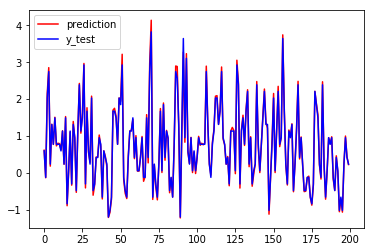

In [53]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test[:200],color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.autoscale(tight=False)
plt2.show()